<a href="https://colab.research.google.com/github/ariakhademi/computer_vision/blob/main/computer_vision_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install diffusers transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Detected: car (ID: 3), Confidence: 0.9824, Box: [334.97638 188.46976 391.03613 206.70123]


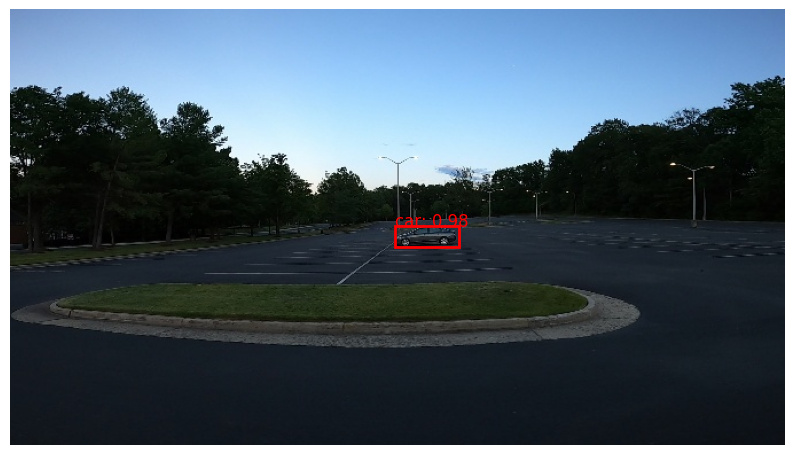

In [ ]:
import os
import torch
from os.path import join
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional
from PIL import Image
import matplotlib.pyplot as plt
import gc

# clear cache
torch.cuda.empty_cache()
gc.collect()

# load model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# move to gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# load data
test_data_path = 'sample_data/car_testing_data/vid_5_400.jpg'
image = Image.open(test_data_path).convert('RGB')
image_tensor = functional.to_tensor(image).to(device=device)

# test_data_path = 'sample_data/car_testing_data/'
# test_data_path_list = [os.path.join(test_data_path, img) \
#                        for img in os.listdir(test_data_path) \
#                        if img.endswith('.jpg')]
# test_data = []
# for image_path in test_data_path_list:
#   image = Image.open(image_path).convert('RGB')
#   image_tensor = functional.to_tensor(image).to(device=device)
#   test_data.append(image_tensor)

# inference
with torch.no_grad():
  predictions = model([image_tensor])[0]

# COCO class names (partial list for clarity)
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


# Process predictions
boxes = predictions['boxes'].cpu().numpy()
labels = predictions['labels'].cpu().numpy()
scores = predictions['scores'].cpu().numpy()

# Filter detections (e.g., score > 0.5)
threshold = 0.5
for i in range(len(labels)):
    if scores[i] >= threshold:
        box = boxes[i]
        label = labels[i]
        score = scores[i]
        class_name = coco_names[label] if label < len(coco_names) else f"Class {label}"
        print(f"Detected: {class_name} (ID: {label}), Confidence: {score:.4f}, Box: {box}")

# Visualize
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()
for i in range(len(labels)):
    if scores[i] >= threshold:
        box = boxes[i]
        rect = plt.Rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1],
            linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(box[0], box[1], f"{coco_names[labels[i]]}: {scores[i]:.2f}", color="r", fontsize=12)
plt.axis("off")
plt.show()



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 174MB/s]


Detected: car (ID: 3), Confidence: 0.9703, Box: [336.83762 188.44699 389.84595 206.94305]


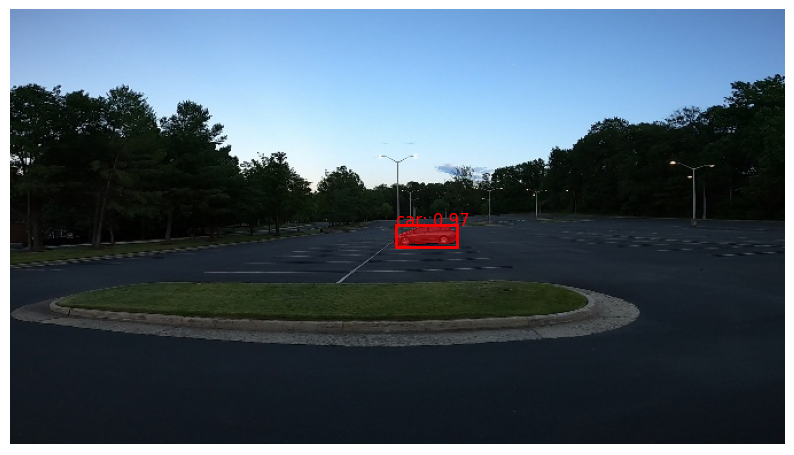

In [ ]:
import os
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Clear GPU memory
torch.cuda.empty_cache()

# Load model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load image
test_data_path = 'sample_data/car_testing_data/vid_5_400.jpg'
image = Image.open(test_data_path).convert('RGB')
image_tensor = F.to_tensor(image).to(device)

# Inference
with torch.no_grad():
    predictions = model([image_tensor])[0]  # Single image, take first dict

# COCO class names (same as before)
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Process predictions
boxes = predictions['boxes'].cpu().numpy()
labels = predictions['labels'].cpu().numpy()
scores = predictions['scores'].cpu().numpy()
masks = predictions['masks'].cpu().numpy()  # Masks for segmentation

# Filter detections (score > 0.5)
threshold = 0.5
detections = []
for i in range(len(labels)):
    if scores[i] >= threshold:
        box = boxes[i]
        label = labels[i]
        score = scores[i]
        mask = masks[i, 0]  # Shape: (H, W), values 0-1
        class_name = coco_names[label] if label < len(coco_names) else f"Class {label}"
        detections.append((box, label, score, mask, class_name))
        print(f"Detected: {class_name} (ID: {label}), Confidence: {score:.4f}, Box: {box}")

# Visualize
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

# Overlay masks and boxes
for box, label, score, mask, class_name in detections:
    # Draw bounding box
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1],
        linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.add_patch(rect)

    # Overlay mask (semi-transparent)
    mask_binary = mask > 0.5  # Threshold mask to binary
    mask_rgb = np.zeros((mask.shape[0], mask.shape[1], 4))  # RGBA
    mask_rgb[mask_binary, 0] = 1  # Red channel
    mask_rgb[mask_binary, 3] = 0.5  # Alpha (semi-transparent)
    plt.imshow(mask_rgb, extent=(0, image.width, image.height, 0))

    # Add label
    ax.text(box[0], box[1], f"{class_name}: {score:.2f}", color="r", fontsize=12)

plt.axis("off")
plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 135MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None

Faster R-CNN: Detected car (ID: 3), Confidence: 0.9824, Box: [334.97638 188.46976 391.03613 206.70123]
Mask R-CNN: Detected car (ID: 3), Confidence: 0.9703, Box: [336.83762 188.44699 389.84595 206.94305]
RetinaNet: Detected car (ID: 3), Confidence: 0.7619, Box: [336.15    189.94345 390.21298 206.43895]


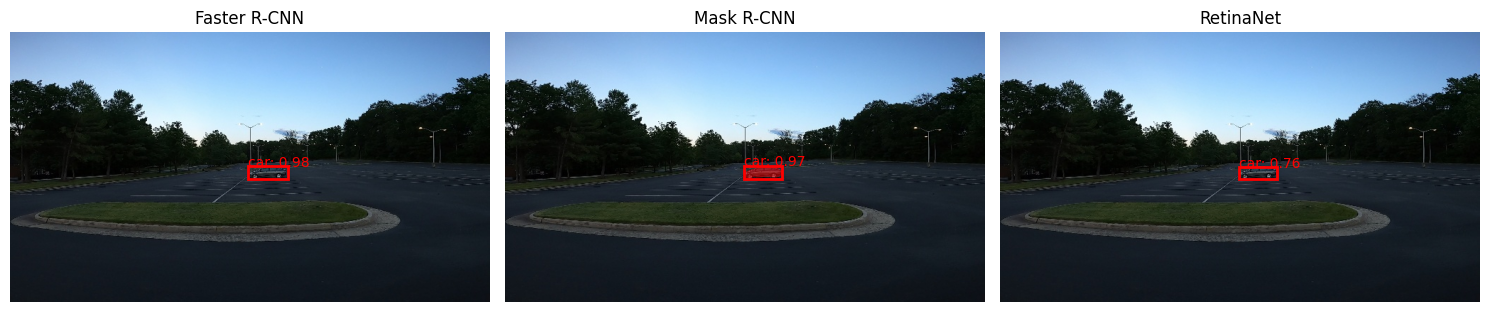

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, maskrcnn_resnet50_fpn, retinanet_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Clear GPU memory
torch.cuda.empty_cache()

# Load image
image_path = 'sample_data/car_testing_data/vid_5_400.jpg'
image = Image.open(image_path).convert('RGB')
image_tensor = F.to_tensor(image)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# COCO class names (partial)
coco_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck']

# Models to compare
models = {
    "Faster R-CNN": fasterrcnn_resnet50_fpn(pretrained=True),
    "Mask R-CNN": maskrcnn_resnet50_fpn(pretrained=True),
    "RetinaNet": retinanet_resnet50_fpn(pretrained=True)
}

# Move models to device and set to eval
for name, model in models.items():
    model.to(device)
    model.eval()

# Run inference and store predictions
predictions = {}
with torch.no_grad():
    for name, model in models.items():
        preds = model([image_tensor.to(device)])[0]  # Single image
        predictions[name] = {
            'boxes': preds['boxes'].cpu().numpy(),
            'labels': preds['labels'].cpu().numpy(),
            'scores': preds['scores'].cpu().numpy(),
            'masks': preds.get('masks', None)  # Only Mask R-CNN has masks
        }

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
threshold = 0.5

for ax, (name, preds) in zip(axes, predictions.items()):
    ax.imshow(image)
    boxes = preds['boxes']
    labels = preds['labels']
    scores = preds['scores']
    masks = preds['masks']

    # Plot detections
    for i in range(len(labels)):
        if scores[i] >= threshold:
            box = boxes[i]
            label = labels[i]
            score = scores[i]
            class_name = coco_names[label] if label < len(coco_names) else f"Class {label}"
            print(f"{name}: Detected {class_name} (ID: {label}), Confidence: {score:.4f}, Box: {box}")

            # Draw box
            rect = plt.Rectangle(
                (box[0], box[1]), box[2] - box[0], box[3] - box[1],
                linewidth=2, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)
            ax.text(box[0], box[1], f"{class_name}: {score:.2f}", color="r", fontsize=10)

            # Draw mask (Mask R-CNN only)
            if masks is not None:
                mask = masks[i, 0].cpu().numpy() > 0.5  # Binary mask
                mask_rgb = np.zeros((mask.shape[0], mask.shape[1], 4))
                mask_rgb[mask, 0] = 1  # Red
                mask_rgb[mask, 3] = 0.5  # Alpha
                ax.imshow(mask_rgb, extent=(0, image.width, image.height, 0))

    ax.set_title(name)
    ax.axis("off")

plt.tight_layout()
plt.show()

100%|██████████| 49.7M/49.7M [00:00<00:00, 153MB/s]



image 1/1 /content/sample_data/car_testing_data/vid_5_400.jpg: 384x640 1 car, 40.9ms
Speed: 2.1ms preprocess, 40.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

YOLOv8 Raw Detections:
Label: bicycle (ID: 2), Score: 0.8580, Box: [     335.06      188.96      389.93      206.48]
Faster R-CNN: Detected car (ID: 3), Confidence: 0.9824, Box: [     334.98      188.47      391.04       206.7]
Mask R-CNN: Detected car (ID: 3), Confidence: 0.9703, Box: [     336.84      188.45      389.85      206.94]
YOLOv8: Detected bicycle (ID: 2), Confidence: 0.8580, Box: [     335.06      188.96      389.93      206.48]


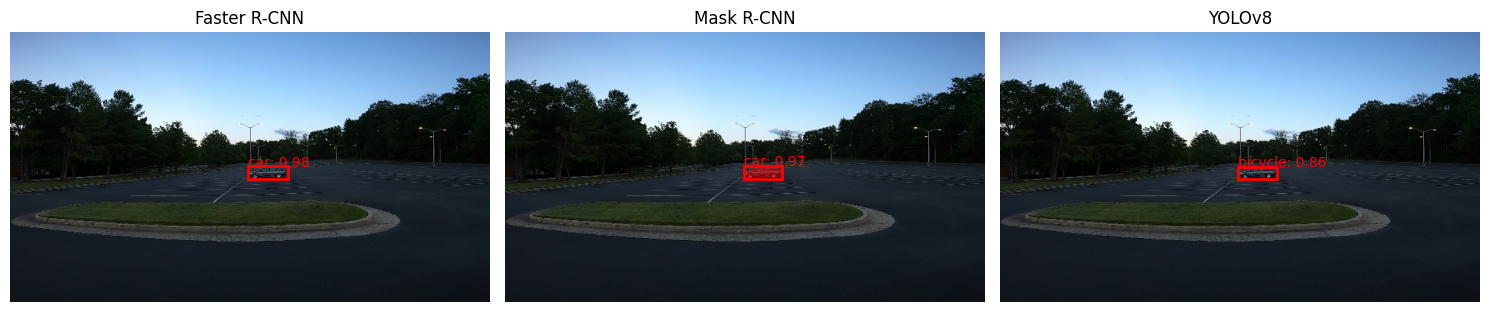

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Install ultralytics if not already installed (run this in Colab first)
# !pip install ultralytics

# Clear GPU memory
torch.cuda.empty_cache()

# Load image
image_path = 'sample_data/car_testing_data/vid_5_400.jpg'
image = Image.open(image_path).convert('RGB')
image_tensor = F.to_tensor(image)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# COCO class names (partial)
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load models
models = {
    "Faster R-CNN": fasterrcnn_resnet50_fpn(pretrained=True),
    "Mask R-CNN": maskrcnn_resnet50_fpn(pretrained=True),
    "YOLOv8": YOLO("yolov8m.pt")  # Medium model for better accuracy
}

# Move PyTorch models to device and set to eval
for name, model in models.items():
    if name != "YOLOv8":
        model.to(device)
        model.eval()

# Run inference
predictions = {}
with torch.no_grad():
    # Faster R-CNN and Mask R-CNN
    for name in ["Faster R-CNN", "Mask R-CNN"]:
        preds = models[name]([image_tensor.to(device)])[0]
        predictions[name] = {
            'boxes': preds['boxes'].cpu().numpy(),
            'labels': preds['labels'].cpu().numpy(),
            'scores': preds['scores'].cpu().numpy(),
            'masks': preds.get('masks', None)
        }

    # YOLOv8
    yolo_results = models["YOLOv8"](image_path)
    yolo_boxes = yolo_results[0].boxes.xyxy.cpu().numpy()  # [x_min, y_min, x_max, y_max]
    yolo_labels = yolo_results[0].boxes.cls.cpu().numpy().astype(int)  # Class IDs
    yolo_scores = yolo_results[0].boxes.conf.cpu().numpy()  # Confidence scores
    predictions["YOLOv8"] = {
        'boxes': yolo_boxes,
        'labels': yolo_labels,
        'scores': yolo_scores,
        'masks': None
    }

    # Debug YOLOv8 detections
    print("\nYOLOv8 Raw Detections:")
    for i in range(len(yolo_labels)):
        print(f"Label: {coco_names[yolo_labels[i]]} (ID: {yolo_labels[i]}), "
              f"Score: {yolo_scores[i]:.4f}, Box: {yolo_boxes[i]}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
threshold = 0.5

for ax, (name, preds) in zip(axes, predictions.items()):
    ax.imshow(image)
    boxes = preds['boxes']
    labels = preds['labels']
    scores = preds['scores']
    masks = preds['masks']

    # Plot detections
    for i in range(len(labels)):
        if scores[i] >= threshold:
            box = boxes[i]
            label = labels[i]
            score = scores[i]
            class_name = coco_names[label] if label < len(coco_names) else f"Class {label}"
            print(f"{name}: Detected {class_name} (ID: {label}), Confidence: {score:.4f}, Box: {box}")

            # Draw box
            rect = plt.Rectangle(
                (box[0], box[1]), box[2] - box[0], box[3] - box[1],
                linewidth=2, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)
            ax.text(box[0], box[1], f"{class_name}: {score:.2f}", color="r", fontsize=10)

            # Draw mask (Mask R-CNN only)
            if masks is not None:
                mask = masks[i, 0].cpu().numpy() > 0.5
                mask_rgb = np.zeros((mask.shape[0], mask.shape[1], 4))
                mask_rgb[mask, 0] = 1  # Red
                mask_rgb[mask, 3] = 0.5  # Alpha
                ax.imshow(mask_rgb, extent=(0, image.width, image.height, 0))

    ax.set_title(name)
    ax.axis("off")

plt.tight_layout()
plt.show()

Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

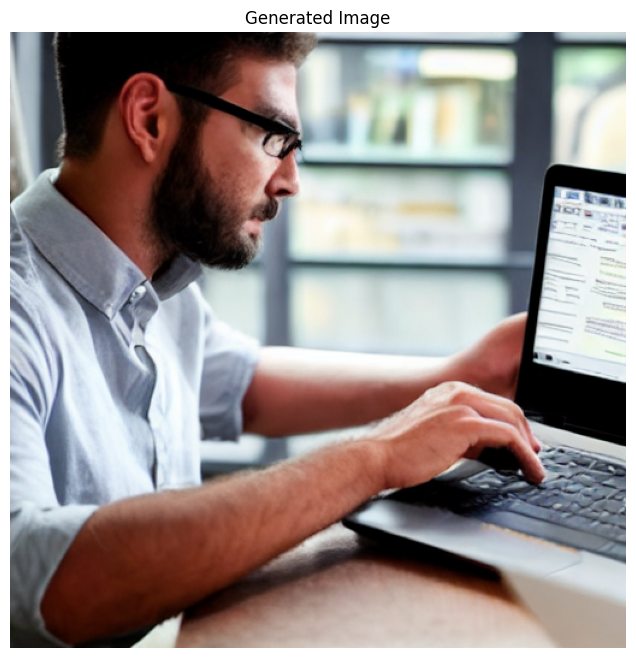

In [7]:
# Import necessary modules
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import Image as IPyImage
import matplotlib.pyplot as plt

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pre-trained Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"  # A popular pre-trained model
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

# Define a text prompt for image generation
prompt = "A man working behind laptop and coding."

# Generate the image
image = pipe(
    prompt,
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

# Display the generated image in Colab
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Generated Image")
plt.show()
